In [65]:
import pandas as pd

In [1]:
def sql_to_df(sql):
    
    from google.cloud import bigquery
    
    client = bigquery.Client()
    query_job = client.query(sql)  # Make an API request.
    df = query_job.result().to_dataframe()
    
    return df

In [108]:
cols = [
 'time',
 'lat',
 'lon',
 'temp_K',
 'dewpt_K',
 'RH_pct',
 'pres_Pa',
 'RadDir_Wm_2',
 '_RadDif_Wm_2',
 'Longwave_Wm_2',
 'Shortwave_Wm_2',
 'WindDir_deg',
 'WindSpd_ms_1',

 ]

# invalid 'ShortwaveNorm_Wm_2',  'RainDpth_mm'

In [76]:
pts = pd.read_csv('temp/base_weath_locs.csv', usecols=['lat','lon'])

In [109]:
cols

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [130]:
cols[3:]

['temp_K',
 'dewpt_K',
 'RH_pct',
 'pres_Pa',
 'RadDir_Wm_2',
 '_RadDif_Wm_2',
 'Longwave_Wm_2',
 'Shortwave_Wm_2',
 'WindDir_deg',
 'WindSpd_ms_1']

In [131]:
avg_str = ', '.join([f'AVG({i}) as {i}' for i in cols[3:]])

In [132]:
avg_str

'AVG(temp_K) as temp_K, AVG(dewpt_K) as dewpt_K, AVG(RH_pct) as RH_pct, AVG(pres_Pa) as pres_Pa, AVG(RadDir_Wm_2) as RadDir_Wm_2, AVG(_RadDif_Wm_2) as _RadDif_Wm_2, AVG(Longwave_Wm_2) as Longwave_Wm_2, AVG(Shortwave_Wm_2) as Shortwave_Wm_2, AVG(WindDir_deg) as WindDir_deg, AVG(WindSpd_ms_1) as WindSpd_ms_1'

In [117]:
f"""
    SELECT lat, lon, {avg_str}
    FROM test1.weath
    GROUP BY lat, lon
    """

'\n    SELECT lat, lon, AVG(WindDir_deg) as WindDir_deg, AVG(WindSpd_ms_1) as WindSpd_ms_1\n    FROM test1.weath\n    GROUP BY lat, lon\n    '

25s to average every variable over the year

In [134]:
%%time


query = f"""
    SELECT lat, lon, {avg_str}
    FROM test1.weath
    GROUP BY lat, lon
    """

df = sql_to_df(query)
df.head()

Wall time: 25.3 s


,lat,lon,temp_K,dewpt_K,RH_pct,pres_Pa,RadDir_Wm_2,_RadDif_Wm_2,Longwave_Wm_2,Shortwave_Wm_2,WindDir_deg,WindSpd_ms_1
0,41.888172,-87.640289,280.212157,274.857538,73.226903,99855.376603,109.798804,55.478328,301.123269,165.277132,198.999520,2.802833
1,41.889019,-87.640289,280.219325,274.863101,73.218879,99854.346846,109.670806,55.638737,301.136110,165.309543,198.680401,2.806677
2,41.867016,-87.627533,280.422723,274.961142,72.692098,99870.171049,111.722105,54.800694,301.212576,166.522800,203.536174,2.859702
3,41.872887,-87.641266,280.274014,274.870643,72.983146,99863.770585,109.501111,55.284577,301.345139,164.785687,197.590026,2.780353
4,41.874687,-87.621918,280.363255,274.953413,72.950792,99872.167010,112.146360,54.248694,300.998768,166.395054,205.989677,2.880658


In [135]:
df.to_csv('temp/weath_annual_avgs.csv')

In [136]:
df.mean()

lat                  41.875074
lon                 -87.629323
temp_K              280.360556
dewpt_K             274.937191
RH_pct               72.883176
pres_Pa           99868.221390
RadDir_Wm_2         111.264469
_RadDif_Wm_2         54.763464
Longwave_Wm_2       301.133202
Shortwave_Wm_2      166.027933
WindDir_deg         202.742197
WindSpd_ms_1          2.859705
dtype: float64

In [125]:
c = df.set_index(['lon','lat'])

In [129]:
c.sort_values('WindSpd_ms_1', ascending=False)

,,WindDir_deg,WindSpd_ms_1
lon,lat,,
-87.617188,41.858589,208.396094,3.001374
-87.617523,41.891693,207.563760,2.999502
-87.617188,41.859444,208.579726,2.993086
-87.617493,41.890846,207.378039,2.992916
-87.618317,41.858582,207.658959,2.990648
-87.617493,41.889999,207.556484,2.986859
-87.617188,41.860291,208.683672,2.985555
-87.618652,41.891685,206.869027,2.984456
-87.618347,41.859432,207.591276,2.981843


In [98]:
# %%time
# rows = []
# for i,coords in list(pts.iterrows()):
#     query = f"""
#         SELECT AVG(temp_K) as temp_K, AVG(dewpt_K) as dewpt_K
#         FROM test1.weath
#         WHERE
#          lat = {coords.lat}
#          AND lon = {coords.lon}
#         """

#     df = sql_to_df(query)
#     df['lon'] = coords.lon
#     df['lat'] = coords.lat
#     rows.append(df)

Wall time: 2.38 s


In [102]:
rows

[       temp_K     dewpt_K        lon        lat
 0  280.642502  275.036546 -87.641113  41.858452,
        temp_K     dewpt_K        lon        lat
 0  280.640644  275.037472 -87.639984  41.858456]

In [101]:
pd.concat(rows)

,temp_K,dewpt_K,lon,lat
0,280.642502,275.036546,-87.641113,41.858452
0,280.640644,275.037472,-87.639984,41.858456


In [85]:
%%time
rows = []
for i in cols[2:3]:
    query = f"""
    SELECT MAX({i}) as max, MIN({i}) as min, AVG({i}) as avg
    FROM test1.weath
    WHERE
     lat = 41.858452
     AND lon = -87.641113
    
    """
    df = sql_to_df(query)
    df.index = [i]
    rows.append(df)

Wall time: 3.54 s


In [88]:

a = pd.concat(rows)

In [70]:
pd.concat(rows)

,max,min,avg
lat,41.891693,41.858452,41.875074
lon,-87.617188,-87.641479,-87.629323
temp_K,307.684113,231.822220,280.360556
dewpt_K,298.356354,218.350616,274.937191
RH_pct,100.000000,0.000100,72.883176
pres_Pa,102071.976562,96909.601562,99868.221390
RadDir_Wm_2,968.091980,0.000000,111.264469
_RadDif_Wm_2,595.861267,-155.008652,54.763464
Longwave_Wm_2,482.509827,0.000000,301.133202
ShortwaveNorm_Wm_2,0.000000,0.000000,0.000000


In [59]:
rows[0].index = ['time']

In [61]:
rows[0]

,max
time,41.891693


In [26]:
df.column_name[:-1].tolist()

['oid',
 'time',
 'lat',
 'lon',
 'temp_K',
 'dewpt_K',
 'RH_pct',
 'pres_Pa',
 'RadDir_Wm_2',
 '_RadDif_Wm_2',
 'Longwave_Wm_2',
 'ShortwaveNorm_Wm_2',
 'Shortwave_Wm_2',
 'WindDir_deg',
 'WindSpd_ms_1',
 'RainDpth_mm']

In [3]:
df.time = df.apply(lambda x : x.time.split('2015-')[1].split('_')[0] , axis=1)

In [4]:
df = df.sort_values(by='time').reset_index()

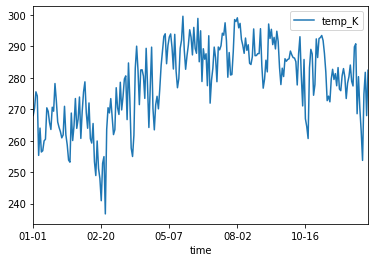

In [5]:
df.plot.line(x='time', y='temp_K')